In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-19.568293268494145 31.69130757411756
12.174684588781517 98.81964710277333
62.333838741329885 61.562298850134425
-10.915043587091645 -61.69457290823047
5.968585796541902 81.0886450112921
-39.856188896472474 -152.59384112987823
70.87700354760628 147.09000585629798
10.879307775605952 -102.41732866334907
60.857930120829394 -16.13476523152633
23.344059492747803 118.69711238396093
56.59966015502059 56.99477426442721
29.10852303569068 71.97453998227658
28.03390782010935 -110.33631282163313
-49.528956441179645 110.00246704784661
-55.43854425136625 -142.84266149501684
76.74889184157644 -7.130924062406052
43.30777317132626 33.25157803748084
55.142105104116666 176.9738685899884
-10.81325669786564 -6.971682578974452
68.44255595677075 173.62613539968766
-72.21451013283486 -65.80260454873385
-52.181090195593875 37.488246535021034
81.01444578086236 -28.105041237261986
67.65160481467905 147.88763844956304
-2.573088355841577 -14.314981097845703
51.52209607479668 -6.486541009141064
25.11320373108667 33

58.44379576404762 126.87092225577044
-15.41290767932 7.951361601574462
29.31284730997858 -139.1889162065135
36.98101888485566 -10.003803829267582
42.93382216370378 117.27644791868374
29.330458350525078 -8.906293269375055
58.73900477474115 91.84937431232595
75.74031446035377 -3.903532987532259
-74.53849034590486 16.602956776917978
41.90198334550621 129.02896043531024
3.9523488303649827 -175.4118920792902
73.24914804054251 -49.712616702533126
52.86429528445461 23.265930288809244
-59.79927448126221 -130.2377742494647
28.84689071295027 55.98694864246042
-43.66255550586068 10.21561562240447
-18.627250734246815 -114.01943226454743
23.202899906903212 -87.63347699382967
26.048462804924768 6.82295864608983
6.933952752369592 34.25560886563915
-0.38533843729192085 122.8713009054743
-15.859336265052107 106.59146777916487
47.361373217507946 113.81655205331475
-28.979825458817736 4.944423301569998
60.257127376545725 -114.95805599177473
-37.52589457480994 -41.31802128951077
-33.85461499407619 -67.742

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | masvingo
Processing Record 2 of Set 1 | mergui
City not found. Skipping...
Processing Record 3 of Set 1 | pelym
Processing Record 4 of Set 1 | ji-parana
City not found. Skipping...
Processing Record 5 of Set 1 | hambantota
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | acapulco
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | makung
City not found. Skipping...
Processing Record 11 of Set 1 | sars
Processing Record 12 of Set 1 | yazman
Processing Record 13 of Set 1 | potam
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | katsiveli
City not found. Skipping...
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Se

Processing Record 36 of Set 4 | babushkin
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | bethel
Processing Record 39 of Set 4 | puerto ayora
Processing Record 40 of Set 4 | verkhnyaya inta
Processing Record 41 of Set 4 | butaritari
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | sorland
Processing Record 44 of Set 4 | ilhabela
Processing Record 45 of Set 4 | bay saint louis
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | biak
Processing Record 48 of Set 4 | melfi
Processing Record 49 of Set 4 | barrow
Processing Record 50 of Set 4 | bintulu
Processing Record 1 of Set 5 | maku
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | xuanhua
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | calvinia
Processing Record 6 of Set 5 | mikropolis
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | nogliki
Processing Record 9 of Set 5 | yumen
Processing Record 10 of 

Processing Record 22 of Set 8 | taoudenni
Processing Record 23 of Set 8 | nizhniy tsasuchey
Processing Record 24 of Set 8 | islamkot
Processing Record 25 of Set 8 | la sarre
Processing Record 26 of Set 8 | calvia
Processing Record 27 of Set 8 | vestmannaeyjar
Processing Record 28 of Set 8 | bidar
Processing Record 29 of Set 8 | holme
Processing Record 30 of Set 8 | sao joao da barra
Processing Record 31 of Set 8 | porto velho
Processing Record 32 of Set 8 | kuusamo
Processing Record 33 of Set 8 | port-gentil
Processing Record 34 of Set 8 | mondlo
Processing Record 35 of Set 8 | niteroi
Processing Record 36 of Set 8 | taltal
Processing Record 37 of Set 8 | tulun
Processing Record 38 of Set 8 | marsh harbour
Processing Record 39 of Set 8 | ayan
Processing Record 40 of Set 8 | koutiala
Processing Record 41 of Set 8 | manga
Processing Record 42 of Set 8 | wangaratta
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | lalmohan
Processing Record 45 of Set 8 | hith

Processing Record 13 of Set 12 | kavaratti
Processing Record 14 of Set 12 | aykhal
Processing Record 15 of Set 12 | beaverlodge
Processing Record 16 of Set 12 | cap malheureux
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | wittenheim
Processing Record 19 of Set 12 | simpang
Processing Record 20 of Set 12 | daru
Processing Record 21 of Set 12 | pionerskiy
Processing Record 22 of Set 12 | moyale
Processing Record 23 of Set 12 | igarka
Processing Record 24 of Set 12 | vilyuysk
Processing Record 25 of Set 12 | torit
Processing Record 26 of Set 12 | jurm
Processing Record 27 of Set 12 | agua verde
Processing Record 28 of Set 12 | vrangel
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | goure
Processing Record 31 of Set 12 | clinton
Processing Record 32 of Set 12 | tuatapere
Processing Record 33 of Set 12 | ramnagar
Processing Record 34 of Set 12 | lompoc
Processing Record 35 of Set 12 | ritchie
Processing Record 36 of Set 12 | chegdomyn


In [30]:
len(city_data)

590

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


In [48]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Masvingo,ZW,2022-05-16 15:57:09,-20.0637,30.8277,62.65,67,75,6.91
1,Pelym,RU,2022-05-16 15:57:09,61.0108,61.9978,53.28,59,46,1.41
2,Hambantota,LK,2022-05-16 15:55:20,6.1241,81.1185,79.14,100,20,9.22
3,Mataura,NZ,2022-05-16 15:57:10,-46.1927,168.8643,56.48,95,74,1.86
4,Chokurdakh,RU,2022-05-16 15:57:11,70.6333,147.9167,24.69,96,100,12.03
5,Acapulco,MX,2022-05-16 15:55:39,16.8634,-99.8901,87.67,50,39,5.14
6,Hofn,IS,2022-05-16 15:57:11,64.2539,-15.2082,55.42,67,75,9.22
7,Sars,RU,2022-05-16 15:57:12,56.5502,57.1366,49.59,89,99,5.44
8,Yazman,PK,2022-05-16 15:57:12,29.1212,71.7446,98.13,12,0,9.04
9,Potam,MX,2022-05-16 15:57:12,27.6000,-110.3833,85.69,24,100,8.03


In [60]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

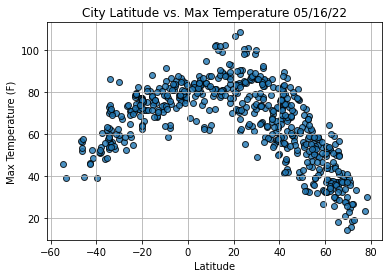

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

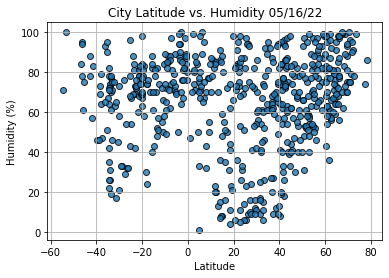

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

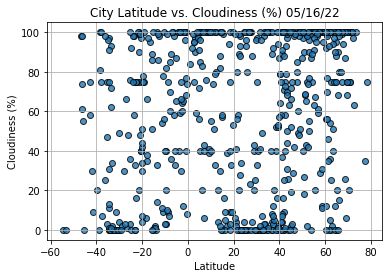

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

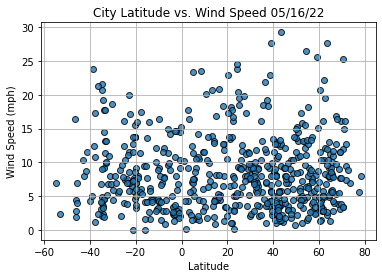

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [91]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [92]:
index1 = city_data_df.loc[1]
index1

City                        Pelym
Country                        RU
Date          2022-05-16 15:57:09
Lat                       61.0108
Lng                       61.9978
Max Temp                    53.28
Humidity                       59
Cloudiness                     46
Wind Speed                   1.41
Name: 1, dtype: object

In [93]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pelym,RU,2022-05-16 15:57:09,61.0108,61.9978,53.28,59,46,1.41
2,Hambantota,LK,2022-05-16 15:55:20,6.1241,81.1185,79.14,100,20,9.22
4,Chokurdakh,RU,2022-05-16 15:57:11,70.6333,147.9167,24.69,96,100,12.03
5,Acapulco,MX,2022-05-16 15:55:39,16.8634,-99.8901,87.67,50,39,5.14
6,Hofn,IS,2022-05-16 15:57:11,64.2539,-15.2082,55.42,67,75,9.22


In [94]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

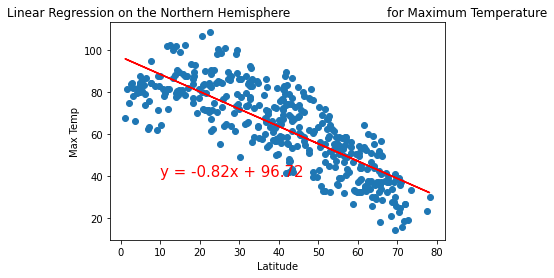

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

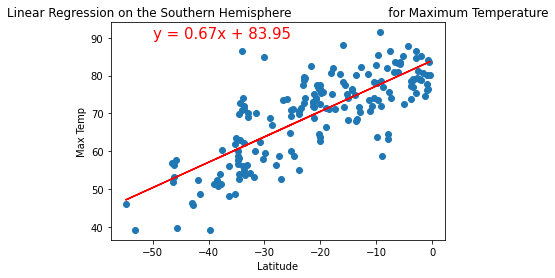

In [101]:
from scipy.stats import linregress
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

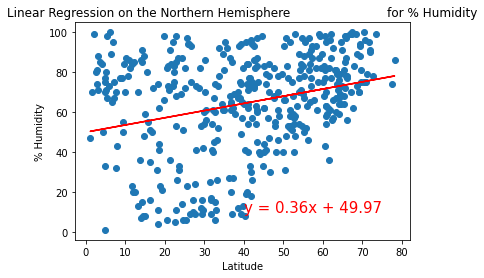

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

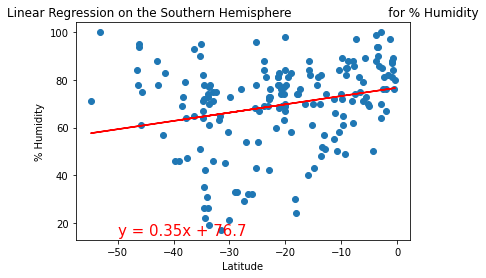

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

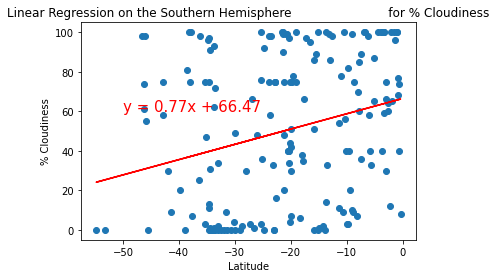

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

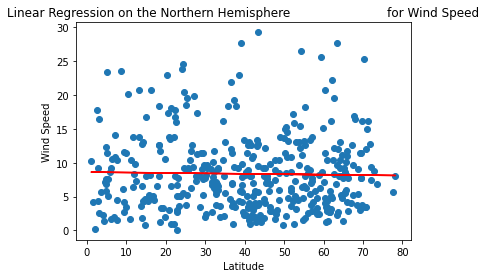

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

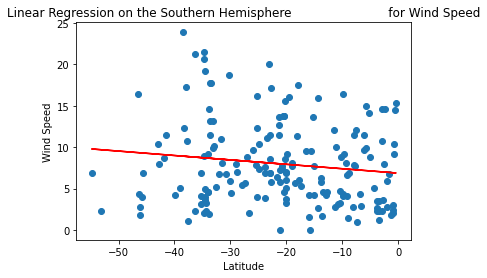

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))